In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

correlation function


In [2]:
np.random.seed(0)

A = np.zeros([3,3,2],dtype = 'complex')

A = A+np.random.random([3,3,2])

A = A+np.random.random([3,3,2])*1j

x = np.array([[0,1],[1,0]])
x = x.reshape([1,1,2,2])

trans1 = funcs.col_contract343(A,x,A)

trans2 = funcs.col_contract343(A,x,A)

trans = funcs.col_contract33(A,A)

lam,v = np.linalg.eig(trans.transpose()) 
index = lam.argsort()[::-1]
Gl = v[:,index[0]]

lam,v = np.linalg.eig(trans) 
index = lam.argsort()[::-1]
Gr = v[:,index[0]]

cor = Gl@trans1@trans@trans@trans2@Gr/(Gl@trans@trans@trans@trans@Gr)
print(cor)

(0.86591449928742+2.2810350840748262e-17j)


In [3]:
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([A])


trans1 = funcs.col_contract343(MPS.B[0],x,MPS.B[0])

trans2 = funcs.col_contract343(MPS.B[0],x,MPS.B[0])

trans = funcs.col_contract33(MPS.B[0],MPS.B[0])

lam,v = np.linalg.eig(trans.transpose()) 
index = lam.argsort()[::-1]
Gl = v[:,index[0]]

lam,v = np.linalg.eig(trans) 
index = lam.argsort()[::-1]
Gr = v[:,index[0]]

cor = Gl@trans1@trans@trans@trans2@Gr/(Gl@trans@trans@trans@trans@Gr)
print(cor)

(0.8659144992874195-1.3920188117035088e-19j)


In [2]:
M = np.zeros([9,9],dtype='complex')
M += np.random.random([9,9])
M = M+M.transpose()

M += np.random.random([9,9])*1j
M = M+M.transpose().conj()


funcs.is_hermitian_upto_a_phase(M)

True

In [3]:
np.random.seed(0)
A = np.random.normal(0,1,[9,9])
A = A@A.transpose()
X = funcs.sqrthm(A,1e-10)
assert (np.linalg.norm(X@X.transpose().conj()-A))<1e-5

In [4]:
np.random.seed(0)
A = np.random.random([3,3,4])
A = A+np.transpose(A,[1,0,2])
B = np.random.random([3,3,4])
B = B+np.transpose(B,[1,0,2])
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([A,B])

1


In [5]:
trans = MPS.transfer_matrix()
isinstance(trans,linalg.LinearOperator)
#isinstance(trans,np.ndarray)

True

In [6]:

trans = MPS.transfer_matrix()
vr = np.eye(MPS.chi[0])
vr = np.reshape(vr,[MPS.chi[0]**2,])
V = trans.dot(vr)
assert np.linalg.norm(V-vr*V[0]) <=1e-12, f'not right canonical, error = {np.linalg.norm(V-vr)}'


vl = MPS.s[0]@MPS.s[0].conj().transpose()
vl = np.reshape(vl,[MPS.chi[0]**2,])
V = trans.rmatvec(vl)
  
assert np.linalg.norm(V-vl*V[0]/vl[0]) <=1e-12, f'not left canonical, error = {np.linalg.norm(V-vl)}'
            

In [7]:
gammaB = MPS.B[1]
transB = funcs.col_contract33(gammaB,gammaB)
vr = np.eye(MPS.chi[0])
vr = np.reshape(vr,[MPS.chi[0]**2,])
V = transB.dot(vr)
assert np.linalg.norm(V-vr*V[0]) <=1e-12, f'not right canonical, error = {np.linalg.norm(V-vr)}'

gammaA = MPS.B[0]
transA = funcs.col_contract33(gammaA,gammaA)
vl = MPS.s[0]@MPS.s[0].conj().transpose()
vl = np.reshape(vl,[MPS.chi[0]**2,])
V = vl@transA
  
vl2 = MPS.s[1]@MPS.s[1].conj().transpose()
vl2 = np.reshape(vl2,[MPS.chi[1]**2,])
assert np.linalg.norm(V-vl2*V[0]/vl2[0]) <=1e-12, f'not left canonical, error = {np.linalg.norm(V-vr)}'

In [8]:
V.shape

(9,)

Test on Toric code

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


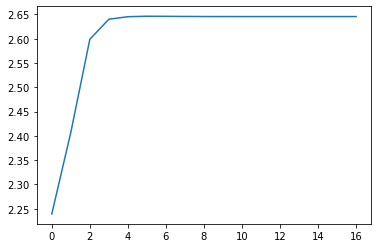

In [9]:
for h in np.arange(0.3,0.301,0.01):
    trans = funcs.single_trans(h)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])

    B = np.zeros([1,1,4])
    B[0,0] =np.random.random([2,2]).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,50)
    MPS_power.update(0,20)
    pyplot.plot(MPS_power.E_history)
    #print(MPS.transfer_matrix(0))
#B[1,1] = np.random.random([2,2]).reshape([4,])


In [10]:
eigs=[]

for h in np.arange(0.,0.3,0.01):   
    
    B = np.zeros([1,1,4])
    B[0,0] =np.array([[np.exp(h),0],[0,np.exp(-h)]]).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        
     
    trans = funcs.single_trans(h)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
    MPS_power.update(0,200)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


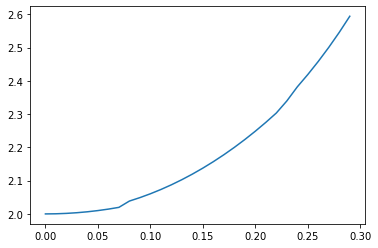

In [11]:
pyplot.plot(np.arange(0.,0.3,0.01),eigs)

In [15]:
eigs

[(1.999999999999997-1.2650479815970684e-47j),
 (2.0004000241795463-2.0301379871118128e-18j),
 (2.001600529636439+1.0435455354950106e-18j),
 (2.0036026952606103-1.1081987534362217e-18j),
 (2.0064085066778437+6.808039269327873e-18j),
 (2.0100207314890537+7.6749419796843555e-19j),
 (2.0144428952929423-1.430242173287957e-18j),
 (2.019679263171416-6.734178120575937e-19j),
 (2.0386092673348317+3.534114402315605e-13j),
 (2.0489312046996786+9.769474797279463e-14j),
 (2.060506227921261-7.263814811336939e-16j),
 (2.073343048092676-5.6643957545376e-15j),
 (2.0874558905210767+3.629920008345034e-15j),
 (2.102859653703115-9.67930582611086e-15j),
 (2.1195717059605577+1.3531000340495865e-14j),
 (2.137610886639798+9.784015791929917e-15j),
 (2.1569982618048336-3.952322889216627e-15j),
 (2.1777572447210525-2.1754548974747448e-15j),
 (2.199913855439273+7.126253157654987e-16j),
 (2.2234970558642613-7.026515937089691e-16j),
 (2.2485391409965603-5.49089410038345e-16j),
 (2.2750761958510433+9.128614430002159e